# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [10]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert

A_invert = ainvert.A_invert.copy()


def compute_partial_derivatives(image, x, y):
    height, width = image.shape[:2]

    x_prev = max(x - 1, 0)
    x_next = min(x + 1, height - 1)
    y_prev = max(y - 1, 0)
    y_next = min(y + 1, width - 1)

    A_x = (image[x_next, y] - image[x_prev, y]) / 2
    A_y = (image[x, y_next] - image[x, y_prev]) / 2
    A_xy = (
                   image[x_next, y_next]
                   - image[x_next, y_prev]
                   - image[x_prev, y_next]
                   + image[x_prev, y_prev]
           ) / 4
    return A_x, A_y, A_xy


def bicubic_interpolation(image_path, scale_x, scale_y):
    image = cv2.imread(image_path)
    input_height, input_width = image.shape[:2]

    output_height = int(input_height * scale_y)
    output_width = int(input_width * scale_x)
    output_image = np.zeros((output_height, output_width, image.shape[2]), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            x_in = x / scale_x
            y_in = y / scale_y

            x1 = int(x_in)
            y1 = int(y_in)

            A = image[y1, x1]
            B = image[y1, min(x1 + 1, input_width - 1)]
            D = image[min(y1 + 1, input_height - 1), x1]
            C = image[min(y1 + 1, input_height - 1), min(x1 + 1, input_width - 1)]

            A_x, A_y, A_xy = compute_partial_derivatives(image, y1, x1)
            B_x, B_y, B_xy = compute_partial_derivatives(image, y1, min(x1 + 1, input_width - 1))
            D_x, D_y, D_xy = compute_partial_derivatives(image, min(y1 + 1, input_height - 1), x1)
            C_x, C_y, C_xy = compute_partial_derivatives(
                image, min(y1 + 1, input_height - 1), min(x1 + 1, input_width - 1)
            )

            x_vector = np.array(
                [
                    A, B, D, C,
                    A_x, B_x, D_x, C_x,
                    A_y, B_y, D_y, C_y,
                    A_xy, B_xy, D_xy, C_xy,
                ]
            )

            a = np.dot(A_invert, x_vector)

            dx = x_in - x1
            dy = y_in - y1

            I_value = 0
            index = 0
            for i in range(4):
                for j in range(4):
                    I_value += a[index] * (dx ** i) * (dy ** j)
                    index += 1

            output_image[y, x] = np.clip(I_value, 0, 255)

    return output_image


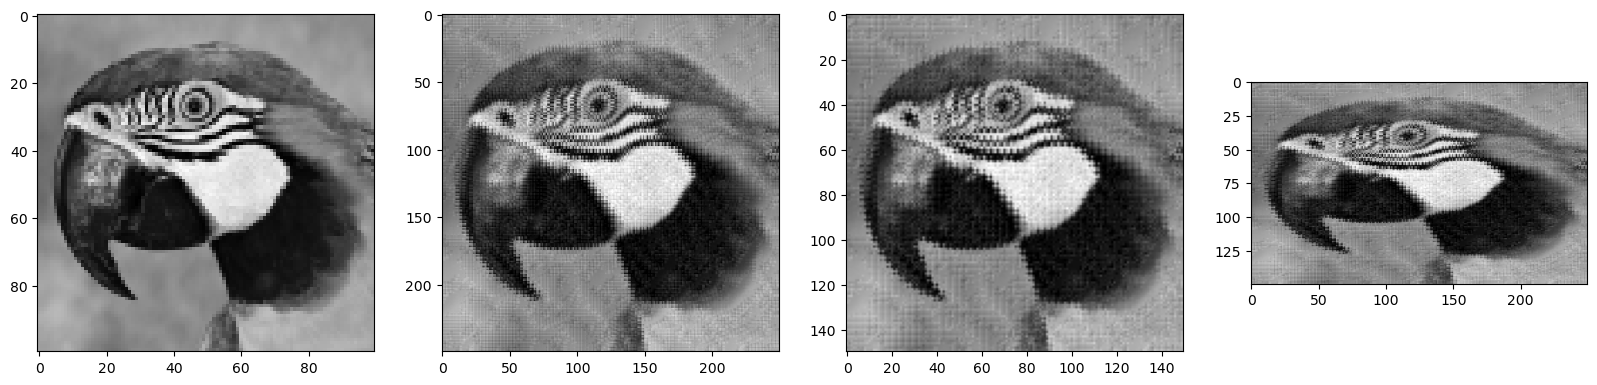

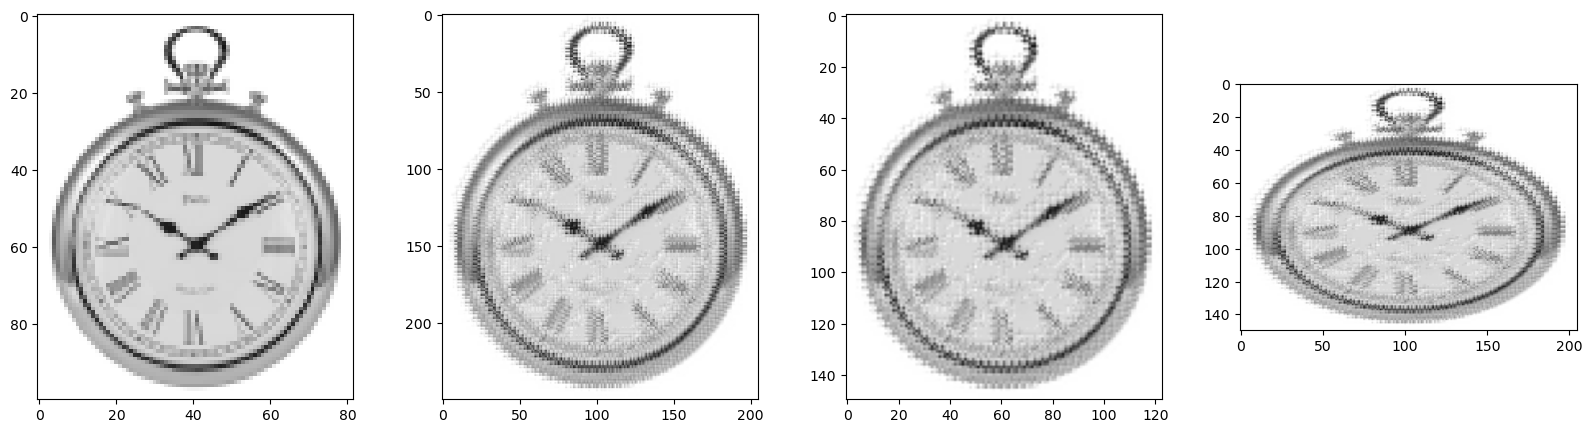

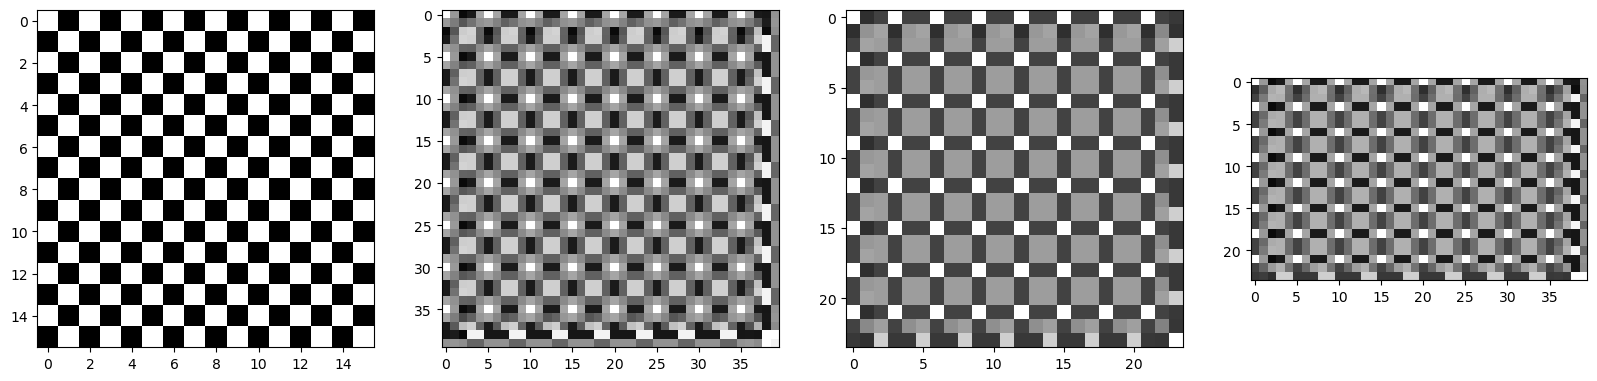

In [11]:
test_images = ["parrot.bmp", "clock.bmp", "chessboard.bmp"]
for image_path in test_images:
    fig, axs = plt.subplots(1, 4)
    fig.set_size_inches(20, 5)

    axs[0].imshow(cv2.imread(image_path), cmap="gray")
    axs[1].imshow(bicubic_interpolation(image_path, 2.5, 2.5), cmap="gray")
    axs[2].imshow(bicubic_interpolation(image_path, 1.5, 1.5), cmap="gray")
    axs[3].imshow(bicubic_interpolation(image_path, 2.5, 1.5), cmap="gray")